<img src = "../Assets/imgs/ML-Codo-g.jpg" alt = "Encabezado MLDS" width = "25%" style="float: left; margin-right:20px" >  </img>

## **MeLi Challenge - Similitud de items**
### **Notebook 03: Agrupacion **
**Por: Andrés Felipe Camacho Baquero - [Personal website](https://anfelipecb.github.io/)**


---
Este código hace hace las agrupaciones de clusters y la reduccion de dimensionalidad para obtener las categorias finales de items parecidos 

**Outline:**
1. Cargamos datos del notebook anterior
2. Clusterizacion 
3. Metricas de desempeño
4. Descargar los datos a carpetas 

> **Nota:** Se debe configurar y activar el entorno virtual (README.md) y haber corrido `notebbok 01` y `notebbok 02`

---

#### 1. Cargamos los datos del notebook anterior 

In [2]:
import os, sys
import pandas as pd

os.getcwd() 
print(sys.executable) #debe datnos el entorno virtual 
sys.path.append('../similarity') # para poder cargar el paquete de python que creamos para el proyecto

/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/melienv/bin/python


In [3]:
import numpy as np 

combined_features_Res50=np.load('../data/final/combined_f_Res50.npy')
combined_features_xception=np.load('../data/final/combined_f_xception.npy')
combined_features_efficientb0=np.load('../data/final/combined_f_efficientb0.npy')
combined_features_efficientb7=np.load('../data/final/combined_f_efficientb7.npy')

#### 2. Clusterizacion

- primero reducimos la dimensionalidad o sino se deora mucho en hacer los clusters

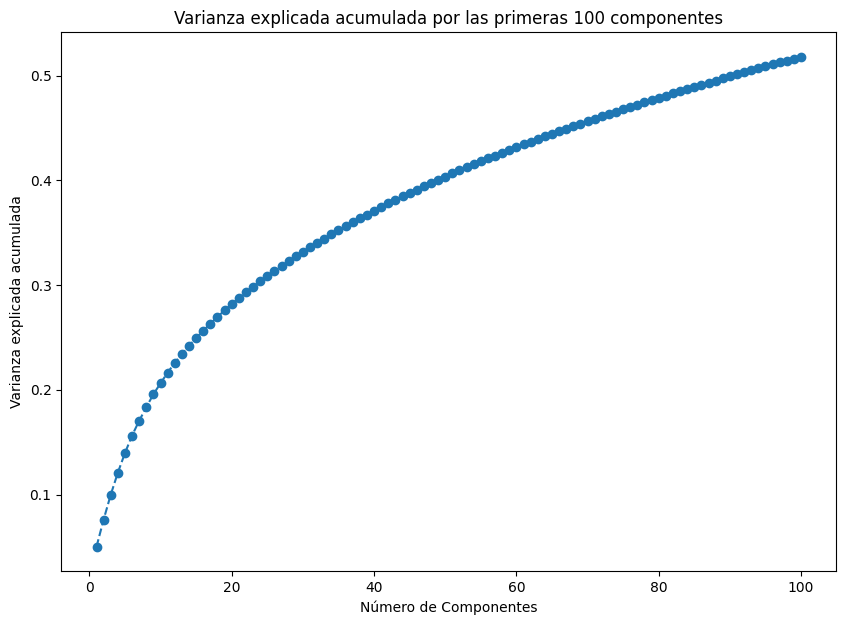

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)

# Para ResNET50
pca.fit(combined_features_Res50)

# Calculamos varianza explicada acumulada 
# Calcula la varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Visualiza la varianza explicada acumulada para las primeras 100 componentes
plt.figure(figsize=(10, 7))
plt.plot(range(1, 101), varianza_acumulada[:100], marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por las primeras 100 componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()



In [5]:
#Aplicamos la reduccion de dimensionalidad a 50 componentes 
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(combined_features_Res50)


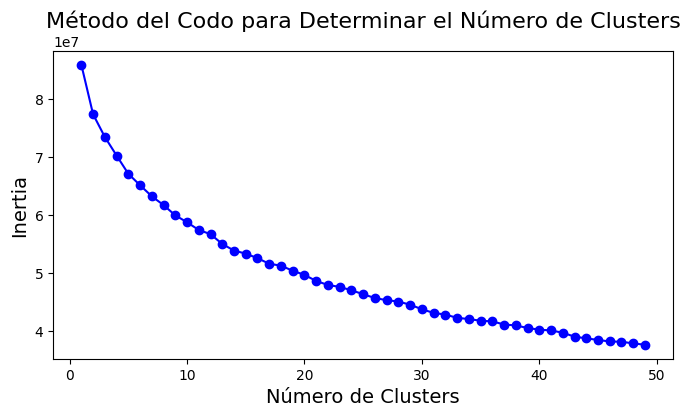

In [6]:
#Con estos super embedings podríamos hacer el cluster de parecidos ya con los embeddings concatenados. 
# Miremos cuántos cluster se sugieren para el resnet50, efficientb0 y para el efficient b7
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculamos la suma de cuadrados dentro de los grupos para diferentes números de clusters
inertias = []
for i in range(1, 50):  # Prueba con un rango de 1 a 50 clusters
    kmeans = KMeans(n_clusters=i, random_state=42).fit(reduced_features)
    inertias.append(kmeans.inertia_)

# Grafica la suma de cuadrados dentro de los grupos
plt.figure(figsize=(8, 4))
plt.plot(range(1, 50), inertias, 'bo-')
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Método del Codo para Determinar el Número de Clusters', fontsize=16)
plt.show()


In [8]:
from importlib import reload
import similarity.custom_funcs
reload(similarity.custom_funcs)

<module 'similarity.custom_funcs' from '/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/Notebooks/../similarity/similarity/custom_funcs.py'>

In [13]:
#Obtenemos los clusters con las componentes y los valores reducidos. 
from importlib import reload
import similarity.custom_funcs
reload(similarity.custom_funcs)

from similarity.custom_funcs import analizar_clusters, ajustar_clustering_y_reducir, calcular_similitud_coseno_clusters

n_components=50
modelo_dim_reduc='PCA'
n_clusters=20

modelo_kmeansRes50, features_reducidasRes50 = ajustar_clustering_y_reducir(
    combined_features_Res50, n_components, modelo_dim_reduc, n_clusters)
modelo_kmeansXception, features_reducidasXception = ajustar_clustering_y_reducir(
    combined_features_xception, n_components, modelo_dim_reduc, n_clusters)
modelo_kmeansEffB0, features_reducidasB0 = ajustar_clustering_y_reducir(
    combined_features_efficientb0, n_components, modelo_dim_reduc, n_clusters)
modelo_kmeansEffB7, features_reducidasB7 = ajustar_clustering_y_reducir(
    combined_features_efficientb7, n_components, modelo_dim_reduc, n_clusters)



#### 3. Metricas de calidad de los clusters 

In [12]:
#Analizamos Silhouette
cluster_stats = analizar_clusters(modelo_kmeansRes50, features_reducidasRes50)
print(cluster_stats)



El score de silueta promedio es: 0.09986689686775208
    cluster  silhouette_mean  silhouette_std  features_mean  features_std
0         0        -0.008250        0.042196       1.738028     36.972267
1         1         0.168672        0.122965       7.981950     44.340279
2         2         0.131966        0.076206      -4.196347     38.078720
3         3         0.105416        0.065756      -4.851030     36.420559
4         4         0.064967        0.064293      -1.034764     37.200245
5         5         0.143162        0.090593       1.983734     41.131165
6         6         0.167865        0.069663       5.209795     41.269470
7         7         0.111106        0.112182       1.569869     44.644905
8         8         0.222394        0.060391      -2.796157     49.699951
9         9         0.247538        0.105423      -2.841662     39.453819
10       10         0.054041        0.049586      -0.302977     37.309937
11       11         0.020339        0.071395       3.416983

In [27]:
#Similitud de coseno
from importlib import reload
import similarity.custom_funcs
reload(similarity.custom_funcs)

from similarity.custom_funcs import analizar_clusters, ajustar_clustering_y_reducir, calcular_similitud_coseno_clusters

cos_sim_cluster = calcular_similitud_coseno_clusters(modelo_kmeansRes50, features_reducidasRes50)
print(cos_sim_cluster)

cos_sim_df = pd.DataFrame(list(cos_sim_cluster.items()), columns=['Cluster', 'Media de Similitud del Coseno'])

print(cos_sim_df)

{0: 0.13605425, 1: 0.5399123, 2: 0.40403578, 3: 0.46977675, 4: 0.4289949, 5: 0.61880034, 6: 0.44533268, 7: 0.35861728, 8: 0.24568273, 9: 0.36971632, 10: 0.6926757, 11: 0.59569746, 12: 0.47726256, 13: 0.68385637, 14: 0.49701062, 15: 0.7161278, 16: 0.20554033, 17: 0.49100867, 18: 0.5694204, 19: 0.37759775}
    Cluster  Media de Similitud del Coseno
0         0                       0.136054
1         1                       0.539912
2         2                       0.404036
3         3                       0.469777
4         4                       0.428995
5         5                       0.618800
6         6                       0.445333
7         7                       0.358617
8         8                       0.245683
9         9                       0.369716
10       10                       0.692676
11       11                       0.595697
12       12                       0.477263
13       13                       0.683856
14       14                       0.497011
15    

## Ahora con la red más potente

- Efficient B7

In [20]:
#cluster_stats = analizar_clusters(modelo_kmeansEffB7, features_reducidasB7)
#print(cluster_stats)

cos_sim_cluster = calcular_similitud_coseno_clusters(modelo_kmeansEffB7, features_reducidasB7)
print(cos_sim_cluster)
cos_sim_df = pd.DataFrame(list(cos_sim_cluster.items()), columns=['Cluster', 'Media de Similitud del Coseno'])

print(cos_sim_df)

{0: 0.3956089, 1: 0.33148095, 2: 0.24906242, 3: 0.3570565, 4: 0.41258103, 5: 0.5909598, 6: 0.43069026, 7: 0.39749175, 8: 0.5764685, 9: 0.35832068, 10: 0.37836528, 11: 0.34371024, 12: 0.18819684, 13: 0.4356723, 14: 0.4835937, 15: 0.5471827, 16: 0.30643222, 17: 0.29989058, 18: 0.51461154, 19: 0.69378585}
    Cluster  Media de Similitud del Coseno
0         0                       0.395609
1         1                       0.331481
2         2                       0.249062
3         3                       0.357056
4         4                       0.412581
5         5                       0.590960
6         6                       0.430690
7         7                       0.397492
8         8                       0.576469
9         9                       0.358321
10       10                       0.378365
11       11                       0.343710
12       12                       0.188197
13       13                       0.435672
14       14                       0.483594
15      

#### 5. Descargar los datos a las carpetas 

Vamos a crear carpetas por cluster de esa ultima y descargamos las imagenes allí


In [31]:
#La base final la cargo 
df_items_all=pd.read_csv('../data/final/data_items_all.csv', low_memory=False)
ids_efficientnetb7=np.load('../data/final/ids_efficientnetb7.npy').tolist()

#los labels finales
cluster_labels=modelo_kmeansEffB7.labels_

In [34]:
#Descarguemos las imagenes y pongamoslas en carpetas para ver qué tal quedó: 
#Creamos una carpeta por grupo (sobreescribimos si ya existen)
import similarity.config
reload(similarity.config)
from similarity.config import data_final_imgs
import requests

import shutil
for i in range(n_clusters):
    os.makedirs(os.path.join(data_final_imgs, f"Grupo_{i}"), exist_ok=True)
    
#Descargamos las imagenes a la carpeta del grupo al que pertenece
def download_image(image_url, save_path):
    """Descarga una imagen y la guarda en un archivo específico."""
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
    except Exception as e:
        print(f"Error al descargar {image_url}: {e}")

from pathlib import Path
# Imagenes están en DataFrame `data_audifonos` con 'id', 'thumbnail' (URLs de las imágenes) y los 'ids' corresponden a los 'labels'
for _, row in df_items_all.iterrows():
    image_id = row['id']
    image_url = row['thumbnail']
    # Encuentra el label del grupo para esta imagen
    group_label = cluster_labels[ids_efficientnetb7.index(image_id)]
    # Define el path donde se guardará la imagen
    save_path = os.path.join(data_final_imgs, f"Grupo_{group_label}", f"{image_id}.jpg")
    p_completi=Path(save_path).resolve()
    print(p_completi)
    # Descarga y guarda la imagen
    download_image(image_url, save_path)

/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_2/MLA1533712914.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_0/MLA1479723106.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_0/MLA1242363814.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_6/MLA1418180832.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_18/MLA1367709752.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_15/MLA1407231661.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_3/MLA1485898182.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_0/MLA1388780429.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_0/MLA1294245045.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/imgs/Grupo_11/MLA1533904908.jpg
/Users/anfelipecb